### Laplace serial code

In [2]:
import numpy as np
import time


start = time.time()
ROWS , COLUMNS = 1000 , 1000
MAX_TEMP_ERROR = 0.01
temperature      = np.empty(( ROWS+2 , COLUMNS+2 ))
temperature_last = np.empty(( ROWS+2 ,COLUMNS+2  ))


def initialize_temperature(temp):

    temp[:,:] = 0

    #Set right side boundery condition
    for i in range(ROWS+1):
        temp[ i , COLUMNS+1 ] = ( 100/ROWS ) * i

    #Set bottom boundery condition
    for i in range(COLUMNS+1):
        temp[ ROWS+1 , i ] = ( 100/ROWS ) * i

    return temp


def output(data):
    data.tofile("plate.out")

    
initialize_temperature(temperature_last)

max_iterations = int (input("Maximum iterations: "))

dt = 100
iteration = 1

while ( dt > MAX_TEMP_ERROR ) and ( iteration < max_iterations ):

    for i in range( 1 , ROWS+1 ):
        for j in range( 1 , COLUMNS+1 ):
            temperature[ i , j ] = 0.25 * ( temperature_last[i+1,j] + temperature_last[i-1,j] +
                                            temperature_last[i,j+1] + temperature_last[i,j-1]   )

    dt = 0

    for i in range( 1 , ROWS+1 ):
        for j in range( 1 , COLUMNS+1 ):
            dt = max( dt, temperature[i,j] - temperature_last[i,j])
            temperature_last[ i , j ] = temperature [ i , j ]

    iteration += 1

print('Time taken (in seconds): ' ,iteration)
output(temperature_last)
end = time.time()
print('Time taken: ', end - start)

Maximum iterations: 3400
Number of iteration:  3373
Time taken:  10594.513558626175


In [3]:
import matplotlib.pyplot as plt

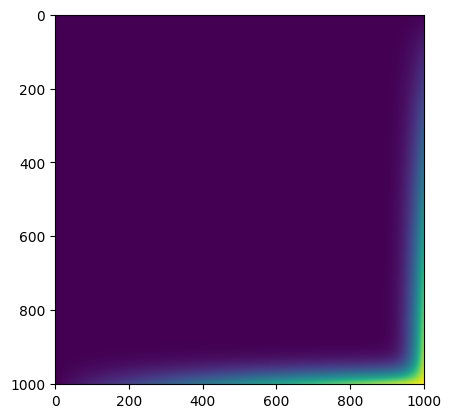

In [4]:
plt.imshow(temperature_last)

### Laplace MPI result

In [5]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

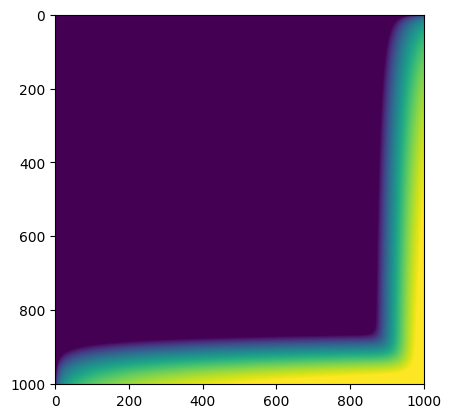

In [6]:
plate = np.fromfile("plate.out", dtype=float).reshape((1000+2,1000+2))
plt.imshow(plate, norm=matplotlib.colors.LogNorm(0.1,50,clip=True))
plt.show()